## Load and apply a trained Keras model

The code of this notebook shows how you can load and apply an already trained Keras model.

In [1]:
from os import environ
environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
import png
from keras.models import load_model
from os import listdir
import matplotlib.pyplot as plt
%matplotlib inline

/home/stefan/py2_virtualenv/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Load the model

Loading a Keras model needs only a single line of code, see below. After this call, the model is back in the same state you stored it at the training step either by the `ModelCheckpoint` or `model.save(...)`.

In [2]:
model = load_model("mnist_model.h5")

## Apply the model

The application is done as shown in the testing phase of the training script. Simply call `model.predict(inputs)` on your data.

In [3]:
predictions = []
images = []
for f in sorted(listdir(".")):
    if "mnist_example_" in f:
        image = np.zeros((1, 28, 28, 1), dtype=np.uint8)
        pngdata = png.Reader(open(f, 'rb')).asDirect()
        for i_row, row in enumerate(pngdata[2]):
            image[0, i_row, :, 0] = row
        images.append(image)
        
        prediction = np.argmax(model.predict(image))
        predictions.append(prediction)

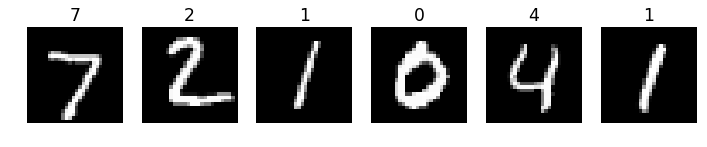

In [4]:
num_examples = len(images)
plt.figure(figsize=(num_examples*2, 2))
plt.rcParams.update({'axes.titlesize': 'xx-large'})
for i in range(num_examples):
    plt.subplot(1, num_examples, i+1)
    plt.axis('off')
    plt.imshow(np.squeeze(images[i]), cmap="gray")
    plt.title("{}".format(predictions[i]))